In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import syllables
import re
import stanza
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [55]:

class TextExcerptExtractor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self = self
    def fit(self, X, y=None):
        return self
    def transform(self, X, y = None):
        X_ = X['excerpt'].values
        return X_
        

In [52]:
#stanza.download('en', logging_level='WARN')
nlp = stanza.Pipeline('en', logging_level='WARN')

In [53]:
df = pd.read_csv('../Data/train.csv', encoding = 'utf-8', lineterminator="\n")

In [68]:
feature = ['excerpt']

X = df[feature].values


In [23]:
sent = X[1]

y = ''

for i in sent:
    i = i.replace("\n", "")
    y += i
sent = y

In [24]:
doc = nlp(sent)

AttributeError: 'Document' object has no attribute 'words'

In [127]:
# print(len(doc.sentences))
# words = 0
# punct = 0
# for sentence in doc.sentences:
#     pos = []
# #     print(sentence)
#     words += len(sentence.words)
#     for word in sentence.words:
#         if word.pos == 'PUNCT':
#             punct += 1
#         pos.append(word.pos)
#         print(word)
#     print(pos)
# print(words - punct)

12
{
  "id": 1,
  "text": "All",
  "lemma": "all",
  "upos": "DET",
  "xpos": "DT",
  "head": 10,
  "deprel": "advmod",
  "start_char": 0,
  "end_char": 3
}
{
  "id": 2,
  "text": "through",
  "lemma": "through",
  "upos": "ADP",
  "xpos": "IN",
  "head": 4,
  "deprel": "case",
  "start_char": 4,
  "end_char": 11
}
{
  "id": 3,
  "text": "dinner",
  "lemma": "dinner",
  "upos": "NOUN",
  "xpos": "NN",
  "feats": "Number=Sing",
  "head": 4,
  "deprel": "compound",
  "start_char": 12,
  "end_char": 18
}
{
  "id": 4,
  "text": "time",
  "lemma": "time",
  "upos": "NOUN",
  "xpos": "NN",
  "feats": "Number=Sing",
  "head": 1,
  "deprel": "nmod",
  "start_char": 19,
  "end_char": 23
}
{
  "id": 5,
  "text": ",",
  "lemma": ",",
  "upos": "PUNCT",
  "xpos": ",",
  "head": 10,
  "deprel": "punct",
  "start_char": 23,
  "end_char": 24
}
{
  "id": 6,
  "text": "Mrs.",
  "lemma": "Mrs.",
  "upos": "PROPN",
  "xpos": "NNP",
  "feats": "Number=Sing",
  "head": 10,
  "deprel": "nsubj",
  "start_cha

In [79]:
PartOfSpeechTags = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET','INTJ', 'NOUN', 
                    'NUM', 'PART', 'PRON','PROPN', 'PUNCT','SCONJ','SYM','VERB','X']

class TextAnalyser(BaseEstimator,TransformerMixin):
    
    PartOfSpeechTags = ['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'DET','INTJ', 'NOUN', 
                    'NUM', 'PART', 'PRON','PROPN', 'PUNCT','SCONJ','SYM','VERB','X']
    
    def __init__(self):
        print("init called")
    
    def fit(self, X, y=None):
        print("fit called")
        return self
    
    def convert_string(excerpt):
        string = ''
        
        for i in excerpt:
            i = i.replace("\n", "")
            string += i
        return string
    
    def transform(self, X, y = None):
        print('transform called')
        X_ = X.copy()
        X_Array = np.array()
        for i in X_:
            doc = nlp(convert_string(i))
            sentences = len(doc.sentences)
            words = 0
            PartOfSpeech = {i for i in PartOfSpeechTags}
            for sentence in doc.sentences:
                words += len(sentence.words)
                for word in sentence.words:
                    PartOfSpeech[word.pos] += 1
            words = words - PartOfSpeech['Punct']
            X_Array.append([sentences, words, *PartOfSpeech.values])
            
        
                    
    


In [130]:
# X_array = []
# def convert_string(excerpt):
#     string = ''

#     for i in excerpt:
#         i = i.replace("\n", "")
#         string += i
#     return string

# for i in X:
#     doc = nlp(convert_string(i))
#     sentences = len(doc.sentences)
#     words = 0
#     syllable_count = 0
#     complex_word_count = 0
#     PartOfSpeech = {i:0 for i in PartOfSpeechTags}
#     for sentence in doc.sentences:
#         words += len(sentence.words)
#         for word in sentence.words:
#             PartOfSpeech[word.pos] += 1
#             if word.pos != 'PUNCT':
#                 syllable_count += syllables.estimate(word.text)
#                 if syllables.estimate(word.lemma) >= 3:
#                     complex_word_count += 1
#     words = words - PartOfSpeech['PUNCT']
#     X_array.append([sentences, words, complex_word_count, syllable_count, *PartOfSpeech.values()])

In [131]:
# X_array

[[11, 180, 11, 253, 13, 21, 5, 16, 11, 30, 0, 42, 4, 3, 8, 5, 25, 2, 0, 20, 0],
 [12,
  172,
  14,
  245,
  13,
  12,
  14,
  12,
  7,
  10,
  3,
  22,
  0,
  7,
  30,
  9,
  51,
  3,
  0,
  30,
  0],
 [8,
  171,
  13,
  240,
  7,
  15,
  16,
  12,
  10,
  12,
  1,
  22,
  1,
  4,
  25,
  20,
  41,
  3,
  0,
  23,
  0],
 [5, 166, 11, 226, 20, 21, 5, 2, 15, 18, 0, 43, 3, 1, 14, 3, 32, 3, 0, 18, 0],
 [5, 147, 6, 180, 31, 17, 2, 3, 10, 31, 0, 16, 2, 2, 9, 17, 28, 0, 0, 7, 0],
 [7, 164, 26, 260, 8, 27, 11, 9, 9, 15, 0, 31, 2, 2, 10, 14, 24, 5, 0, 21, 0],
 [8, 176, 20, 272, 18, 26, 4, 13, 7, 19, 0, 31, 1, 3, 11, 26, 20, 3, 0, 14, 0],
 [7, 176, 15, 247, 12, 29, 11, 10, 3, 30, 0, 38, 6, 4, 8, 6, 18, 4, 0, 15, 0],
 [10, 165, 12, 233, 11, 19, 5, 6, 6, 19, 1, 39, 1, 2, 13, 7, 29, 6, 0, 30, 0],
 [8,
  194,
  11,
  266,
  17,
  20,
  10,
  10,
  11,
  26,
  0,
  31,
  2,
  6,
  22,
  1,
  23,
  6,
  0,
  32,
  0],
 [5, 187, 38, 314, 14, 23, 6, 19, 9, 22, 0, 30, 1, 4, 18, 11, 17, 8, 0, 22, 0],
 [9,

In [132]:
# # X_array = np.array(X_array)
# pd.DataFrame(X_array).to_csv('../Data/POS.csv')

In [ ]:
pos = 

In [133]:
targetValues = df['target'].values

In [134]:
reg = LinearRegression()

In [135]:
lin_scores = cross_val_score(reg, X_array, targetValues, scoring="neg_mean_absolute_error", cv=10)

In [136]:
lin_scores = - lin_scores

In [137]:
lin_scores, lin_scores.mean(), lin_scores.std()

(array([0.58748557, 0.71196154, 0.7370633 , 0.71674263, 0.62605086,
        0.65625646, 0.68822282, 0.65913333, 0.5167674 , 0.65089023]),
 0.6550574135380975,
 0.06279724083745178)

In [138]:
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, X_array,targetValues, scoring="neg_mean_absolute_error", cv=10)
scores = - scores
scores, scores.mean(), scores.std()

(array([0.90993673, 0.9009323 , 0.97541276, 0.89511711, 0.95529815,
        0.87798613, 0.8861317 , 0.87159081, 0.81952448, 0.88961634]),
 0.898154650682509,
 0.04111267497665276)

In [139]:
sdg_reg = SGDRegressor()
scaler = StandardScaler()
scaledMetric = scaler.fit_transform(X_array)
sdg_reg.fit(scaledMetric, targetValues)

SGDRegressor()

In [140]:
sdg_scores = cross_val_score(sdg_reg, scaledMetric, targetValues, scoring="neg_mean_absolute_error", cv=10)
sdg_scores = - sdg_scores
sdg_scores, sdg_scores.mean(), sdg_scores.std()

(array([0.5882342 , 0.70602746, 0.72338246, 0.71425647, 0.62539222,
        0.66316355, 0.68737053, 0.66462797, 0.5178249 , 0.65132293]),
 0.6541602688809877,
 0.0601300700610272)

In [141]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(scaledMetric, targetValues)
gb_scores = cross_val_score(gb_reg, scaledMetric, targetValues, scoring="neg_mean_absolute_error", cv=10)
gb_scores = - gb_scores
gb_scores, gb_scores.mean(), gb_scores.std()

(array([0.60484577, 0.69387942, 0.73974913, 0.68075003, 0.63093591,
        0.63477579, 0.66581881, 0.65904522, 0.53065123, 0.65740236]),
 0.6497853666723412,
 0.053094734590640444)

In [142]:
rf_reg = RandomForestRegressor()
rf_reg.fit(scaledMetric, targetValues)
rf_scores = cross_val_score(rf_reg, scaledMetric, targetValues, scoring="neg_mean_absolute_error", cv=10)
rf_scores = - rf_scores
rf_scores, rf_scores.mean(), rf_scores.std()

(array([0.59680933, 0.66871613, 0.75981263, 0.68486523, 0.65219397,
        0.64730395, 0.6500451 , 0.68725998, 0.537962  , 0.66548282]),
 0.6550451143914142,
 0.05512896692519568)

In [122]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=1200):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure scatter_matrix_plot


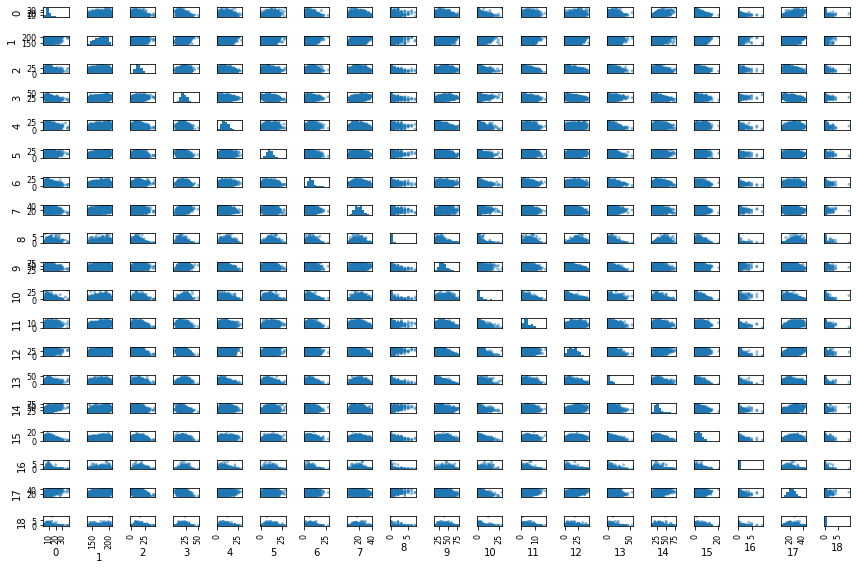

In [123]:
from pandas.plotting import scatter_matrix
pdArray = pd.DataFrame(X_array)
scatter_matrix(pdArray, figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [152]:
pca = PCA()

In [153]:
pca.fit(X_array)

PCA()

In [158]:
pca.explained_variance_ratio_

array([7.27677665e-01, 1.16972212e-01, 3.73520324e-02, 2.90347035e-02,
       2.34252234e-02, 1.27515299e-02, 9.49116338e-03, 8.83883050e-03,
       7.33892758e-03, 6.53595437e-03, 4.66498918e-03, 3.91804893e-03,
       3.10100631e-03, 2.92704567e-03, 2.72725136e-03, 1.72919482e-03,
       1.24012609e-03, 1.40305363e-04, 9.02728257e-05, 4.35172533e-05,
       2.16463847e-33])

In [156]:
pca.singular_values_

array([2.29454624e+03, 9.19959363e+02, 5.19857616e+02, 4.58338131e+02,
       4.11688905e+02, 3.03744512e+02, 2.62051721e+02, 2.52885946e+02,
       2.30432427e+02, 2.17461209e+02, 1.83718382e+02, 1.68369034e+02,
       1.49788550e+02, 1.45526486e+02, 1.40472036e+02, 1.11853417e+02,
       9.47240405e+01, 3.18613687e+01, 2.55567609e+01, 1.77442656e+01,
       1.25146866e-13])

In [157]:
pca.components_

array([[-2.93103244e-04,  2.55878099e-01,  2.22092424e-01,
         9.20780488e-01,  6.00039653e-02,  5.81098958e-02,
        -4.03661904e-03,  1.13994133e-02,  1.52599893e-03,
         3.74468170e-02, -2.82898273e-03,  1.55075888e-01,
         8.90122945e-03, -3.51016074e-03, -6.76860377e-02,
         5.12809273e-03, -6.61855297e-03,  4.48682280e-04,
         1.42533177e-03, -5.87742197e-03,  3.52006255e-04],
       [-1.05382896e-01, -7.39557143e-01,  3.41061053e-01,
         6.67198114e-02,  5.83922240e-02,  2.09916053e-02,
        -1.02423726e-01, -7.26366741e-02, -4.14189878e-02,
        -2.31299855e-02, -1.32897906e-02,  1.38052015e-01,
         9.07254701e-03, -5.64899311e-02, -3.49345535e-01,
        -3.11727530e-02, -3.07788194e-01, -3.85817278e-02,
         2.54357230e-03, -2.39910165e-01, -2.09830780e-04],
       [-4.59287343e-02,  2.87589489e-01, -2.25349336e-01,
        -1.82230651e-01,  1.67444126e-02,  2.13764743e-01,
        -7.90501316e-02, -6.31900299e-02,  2.75467941e